In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_tf_matrix(input_arr, thsld):
    tf_arr=[]
    for elements in input_arr:
        if elements<thsld:
            tf_arr.append(False)
        else:
            tf_arr.append(True)
    return tf_arr

In [4]:
def get_conf_matrx_element(input_arr, ref_arr):
    tp=0
    tn=0
    fp=0
    fn=0
    conf=[]
    for index in range(0,len(ref_arr)):
        if ref_arr[index]==False and input_arr[index]==False:
            tn=tn+1
        elif ref_arr[index]==False and input_arr[index]==True:
            fp=fp+1
        elif ref_arr[index]==True and input_arr[index]==False:
            fn=fn+1
        else:
            tp=tp+1
    conf.append(tp)
    conf.append(tn)
    conf.append(fp)
    conf.append(fn)
    return conf

In [5]:
def get_roc_points(conf):
    roc_points=np.empty((len(conf),2))
    for index, arr in enumerate(conf):
        roc_point=[]
        roc_point.append(arr[0]/(arr[0]+arr[3]))
        roc_point.append(arr[2]/(arr[2]+arr[1]))
        roc_points[index]=np.array(roc_point)
    return roc_points

In [6]:
def auc(y,x):
    area=np.trapz(y,x,axis=-1)
    return abs(area)

AUC for model1 is: 0.9923660388862101
AUC for model2 is: 0.9718799286104365
True Positive Rate for Model1 when false acceptance rate is .10% is:  98.93 %
True Positive Rate for Model2 when false acceptance rate is .10% is: 95.15 %


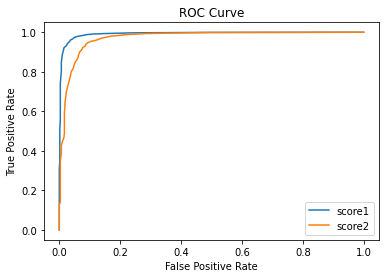

In [7]:
if __name__ == "__main__":
    score1=np.load("score.npy")
    score2=np.load("score1.npy")
    label=np.load("label.npy")
    thsld_scr1=np.linspace(0,score1.max(),151)
    thsld_scr2=np.linspace(0,score2.max(),151)
    score1_tf_matrix=np.empty((len(thsld_scr1),len(score1)))
    score2_tf_matrix=np.empty((len(thsld_scr2),len(score2)))
    for index, thsld in enumerate(thsld_scr1):
        score1_tf_matrix[index]=np.array(create_tf_matrix(score1,thsld))
    for index, thsld in enumerate(thsld_scr2):
        score2_tf_matrix[index]=np.array(create_tf_matrix(score2,thsld))
    label_tf_matrix=create_tf_matrix(label,0.2)
    con_mtrx_score1=np.empty((len(thsld_scr1),4))
    con_mtrx_score2=np.empty((len(thsld_scr2),4))
    for index, elements in enumerate(score1_tf_matrix):
        con_mtrx_score1[index]=np.array(get_conf_matrx_element(elements,label_tf_matrix))
    for index, elements in enumerate(score2_tf_matrix):
        con_mtrx_score2[index]=np.array(get_conf_matrx_element(elements,label_tf_matrix))
    roc_points_score1=get_roc_points(con_mtrx_score1)
    roc_points_score2=get_roc_points(con_mtrx_score2)
    x_score1=[]
    y_score1=[]
    x_score2=[]
    y_score2=[]
    for elements in roc_points_score1:
        x_score1.append(elements[1])
        y_score1.append(elements[0])
    for elements in roc_points_score2:
        x_score2.append(elements[1])
        y_score2.append(elements[0])
    x_score1=x_score1[::-1]
    x_score2=x_score2[::-1]
    y_score1=y_score1[::-1]
    y_score2=y_score2[::-1]
    plt.plot(x_score1,y_score1, label= 'score1')
    plt.plot(x_score2,y_score2, label= 'score2')
    plt.legend(["score1","score2"])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    print("AUC for model1 is:",auc(y_score1,x_score1))
    print("AUC for model2 is:",auc(y_score2,x_score2))
    print("True Positive Rate for Model1 when false acceptance rate is .10% is: ",round(np.interp(.1,x_score1,y_score1)*100,2),"%")
    print("True Positive Rate for Model2 when false acceptance rate is .10% is:",round(np.interp(.1,x_score2,y_score2)*100,2),"%")
    